# Data Cleaning

In [3]:
import pandas as pd

In [4]:
holidays_events_df = pd.read_csv('holidays_events.csv')
holidays_events_df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [5]:
oil_df = pd.read_csv('oil.csv')
oil_df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [6]:
stores_df = pd.read_csv('stores.csv')
stores_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [7]:
train_df = pd.read_csv('train.csv')
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [8]:
# Read the CSV file
sample_submission_df = pd.read_csv('sample_submission.csv')
sample_submission_df.head()

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [9]:
# Interpolate missing oil prices
oil_df['dcoilwtico'] = oil_df['dcoilwtico'].interpolate(method='linear')

# Convert date columns to datetime objects
train_df['date'] = pd.to_datetime(train_df['date'])
oil_df['date'] = pd.to_datetime(oil_df['date'])
holidays_events_df['date'] = pd.to_datetime(holidays_events_df['date'])

# Merge datasets
df = pd.merge(train_df, stores_df, on='store_nbr', how='left')
df = pd.merge(df, oil_df, on='date', how='left')
df = pd.merge(df, holidays_events_df, on='date', how='left')

# Display info and first few rows of the merged DataFrame
df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 16 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   city         object        
 7   state        object        
 8   type_x       object        
 9   cluster      int64         
 10  dcoilwtico   float64       
 11  type_y       object        
 12  locale       object        
 13  locale_name  object        
 14  description  object        
 15  transferred  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(9)
memory usage: 372.8+ MB


# Feature Engineering

In [11]:
# Time-based features
df['day'] = df['date'].dt.day
df['week'] = df['date'].dt.isocalendar().week
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['dayofweek'] = df['date'].dt.dayofweek
print(df.head())

   id       date  store_nbr      family  sales  onpromotion   city      state  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  Quito  Pichincha   
1   1 2013-01-01          1   BABY CARE    0.0            0  Quito  Pichincha   
2   2 2013-01-01          1      BEAUTY    0.0            0  Quito  Pichincha   
3   3 2013-01-01          1   BEVERAGES    0.0            0  Quito  Pichincha   
4   4 2013-01-01          1       BOOKS    0.0            0  Quito  Pichincha   

  type_x  cluster  ...   type_y    locale locale_name         description  \
0      D       13  ...  Holiday  National     Ecuador  Primer dia del ano   
1      D       13  ...  Holiday  National     Ecuador  Primer dia del ano   
2      D       13  ...  Holiday  National     Ecuador  Primer dia del ano   
3      D       13  ...  Holiday  National     Ecuador  Primer dia del ano   
4      D       13  ...  Holiday  National     Ecuador  Primer dia del ano   

  transferred day  week  month  year  dayofweek  


In [12]:
# Event-based features
df['is_holiday'] = df['type_y'].apply(lambda x: 1 if x == 'Holiday' else 0)
df['is_promotion'] = df['onpromotion']
# Fix the payday logic
df['is_payday'] = ((df['date'].dt.day == 15) | (df['date'].dt.day == df['date'].dt.daysinmonth)).astype(int)
df['is_earthquake'] = ((df['date'] == pd.to_datetime('2016-04-16'))).astype(int)

In [13]:
# Rolling statistics
df['rolling_mean_7'] = df.groupby('store_nbr')['sales'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
df['rolling_std_7'] = df.groupby('store_nbr')['sales'].transform(lambda x: x.rolling(window=7, min_periods=1).std())
df['rolling_mean_30'] = df.groupby('store_nbr')['sales'].transform(lambda x: x.rolling(window=30, min_periods=1).mean())
df['rolling_std_30'] = df.groupby('store_nbr')['sales'].transform(lambda x: x.rolling(window=30, min_periods=1).std())

In [14]:
# Lagged features
df['sales_lag_7'] = df.groupby('store_nbr')['sales'].shift(7)
df['sales_lag_30'] = df.groupby('store_nbr')['sales'].shift(30)

# Store-specific aggregations
average_sales_per_store_type = df.groupby('type_x')['sales'].mean()
top_selling_product_families = df.groupby(['cluster', 'family'])['sales'].sum().reset_index().sort_values(['cluster', 'sales'], ascending=[True, False]).groupby('cluster').head(3)

# Fill missing values resulting from rolling statistics and lagged features
df.fillna(method='bfill', inplace=True)

display(df.head())

<ipython-input-14-f42f99ce75e3>:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)
<ipython-input-14-f42f99ce75e3>:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(method='bfill', inplace=True)


,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,...,is_holiday,is_promotion,is_payday,is_earthquake,rolling_mean_7,rolling_std_7,rolling_mean_30,rolling_std_30,sales_lag_7,sales_lag_30
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,...,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,...,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,...,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,...,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,...,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 31 columns):
 #   Column           Dtype         
---  ------           -----         
 0   id               int64         
 1   date             datetime64[ns]
 2   store_nbr        int64         
 3   family           object        
 4   sales            float64       
 5   onpromotion      int64         
 6   city             object        
 7   state            object        
 8   type_x           object        
 9   cluster          int64         
 10  dcoilwtico       float64       
 11  type_y           object        
 12  locale           object        
 13  locale_name      object        
 14  description      object        
 15  transferred      bool          
 16  day              int32         
 17  week             UInt32        
 18  month            int32         
 19  year             int32         
 20  dayofweek        int32         
 21  is_holiday       int64         

# Data exploration

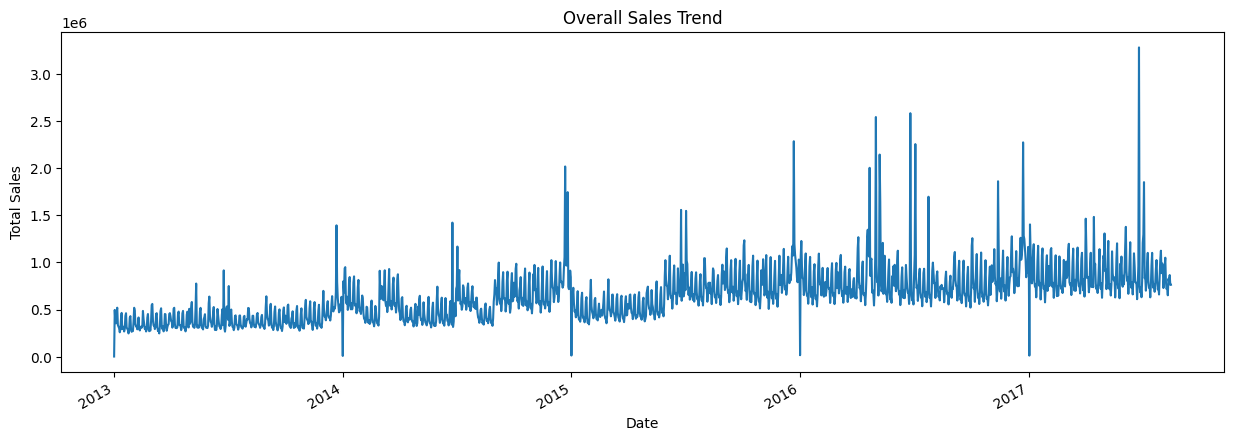

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Overall Sales Trend
plt.figure(figsize=(15, 5))
df.groupby('date')['sales'].sum().plot()
plt.title('Overall Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

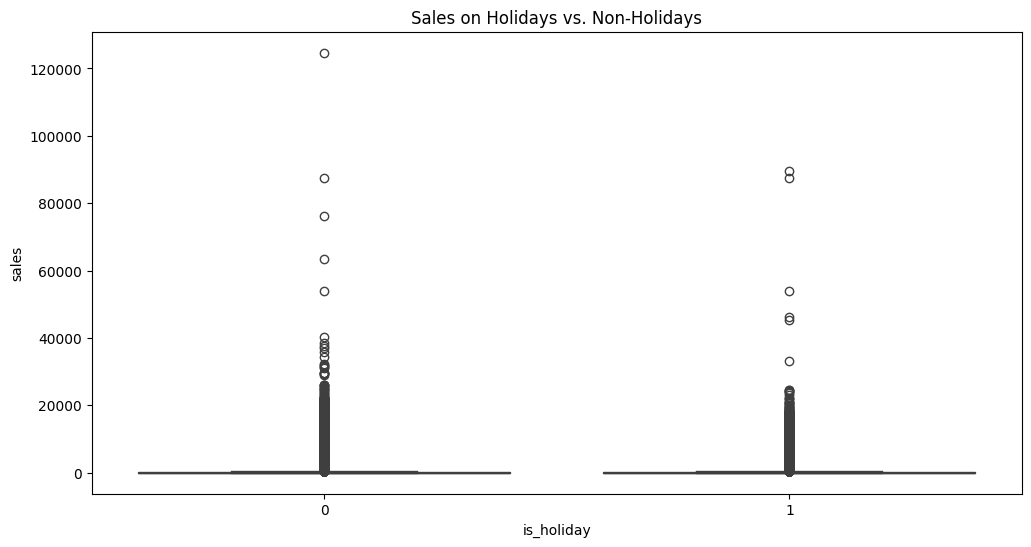

In [17]:
# 2. Holiday and Promotion Impact
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_holiday', y='sales', data=df)
plt.title('Sales on Holidays vs. Non-Holidays')
plt.show()

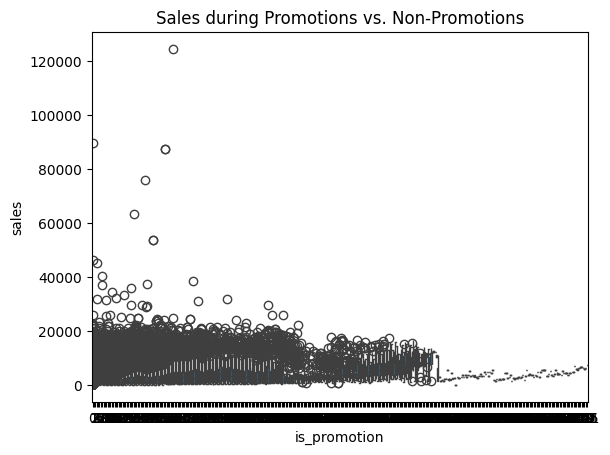

In [18]:
sns.boxplot(x='is_promotion', y='sales', data=df)
plt.title('Sales during Promotions vs. Non-Promotions')
plt.show()

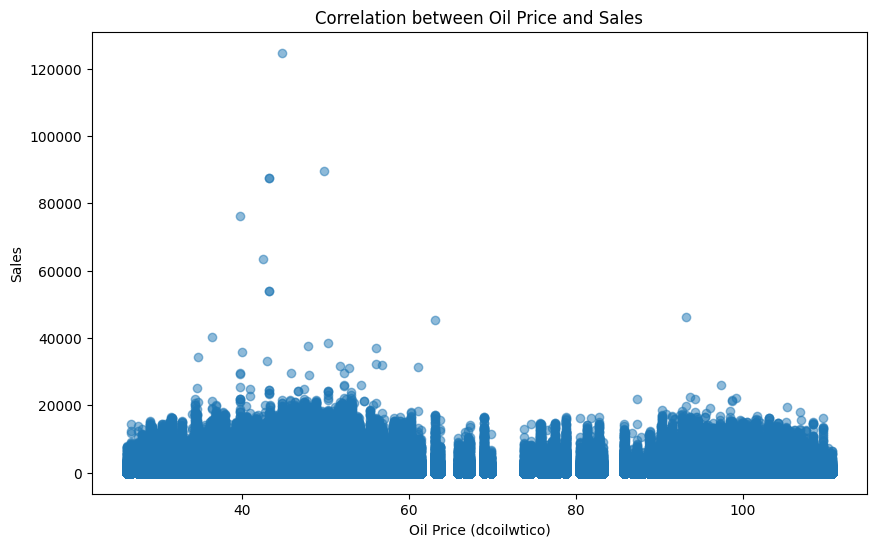

In [19]:
# 3. Oil Price and Sales Correlation
plt.figure(figsize=(10, 6))
plt.scatter(df['dcoilwtico'], df['sales'], alpha=0.5)
plt.title('Correlation between Oil Price and Sales')
plt.xlabel('Oil Price (dcoilwtico)')
plt.ylabel('Sales')
plt.show()

In [20]:
correlation = df['dcoilwtico'].corr(df['sales'])
print(f"Correlation between oil price and sales: {correlation}")

Correlation between oil price and sales: -0.07565716418563771


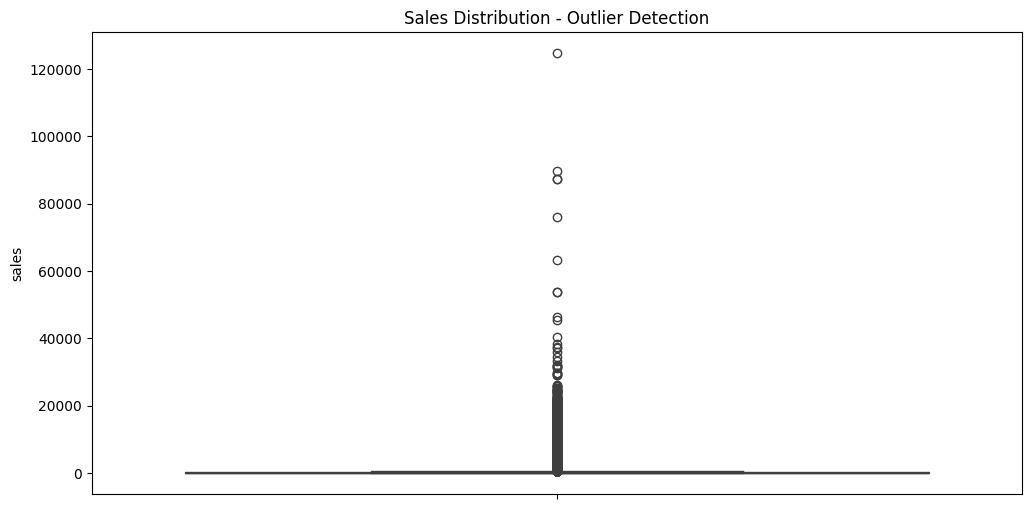

In [21]:
# 4. Anomalies Detection
plt.figure(figsize=(12, 6))
sns.boxplot(y='sales', data=df)
plt.title('Sales Distribution - Outlier Detection')
plt.show()

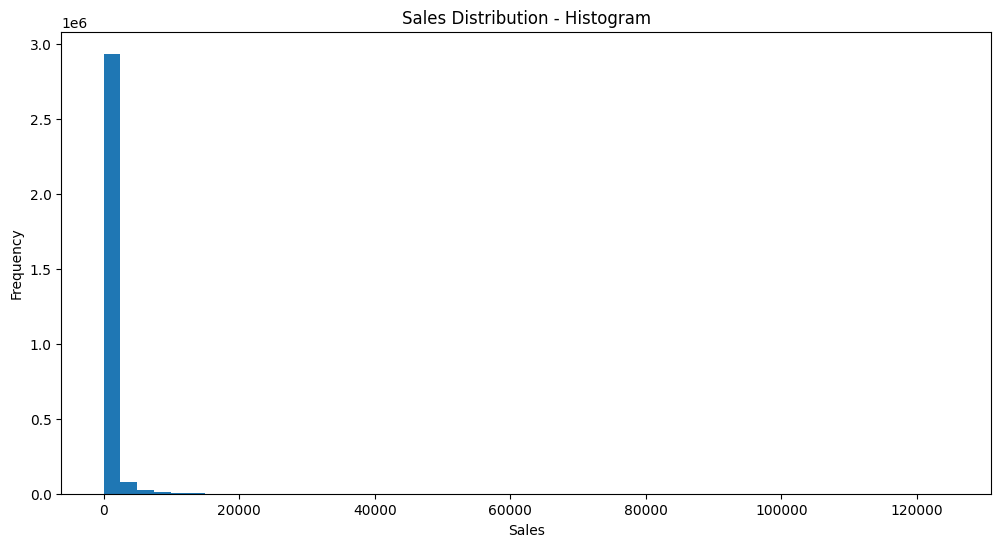

In [22]:
plt.figure(figsize=(12, 6))
plt.hist(df['sales'], bins=50)
plt.title('Sales Distribution - Histogram')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [23]:
#remove outliers from sales

# Calculate the IQR
q1 = df['sales'].quantile(0.25)
q3 = df['sales'].quantile(0.75)
iqr = q3 - q1

# Define bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter out outliers
df1 = df[(df['sales'] >= lower_bound) & (df['sales'] <= upper_bound)]

# Print the number of outliers removed
print(f"Number of outliers removed: {len(df) - len(df1)}")

Number of outliers removed: 455506


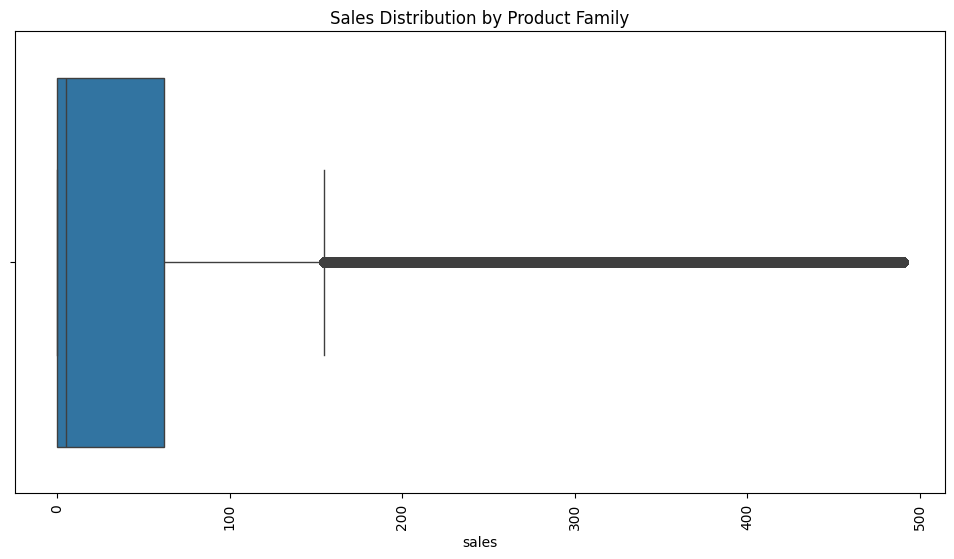

In [24]:
# box plot sales
plt.figure(figsize=(12, 6))
sns.boxplot(x='sales', data=df1)
plt.title('Sales Distribution by Product Family')
plt.xticks(rotation=90)
plt.show()

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2598842 entries, 0 to 3054347
Data columns (total 31 columns):
 #   Column           Dtype         
---  ------           -----         
 0   id               int64         
 1   date             datetime64[ns]
 2   store_nbr        int64         
 3   family           object        
 4   sales            float64       
 5   onpromotion      int64         
 6   city             object        
 7   state            object        
 8   type_x           object        
 9   cluster          int64         
 10  dcoilwtico       float64       
 11  type_y           object        
 12  locale           object        
 13  locale_name      object        
 14  description      object        
 15  transferred      bool          
 16  day              int32         
 17  week             UInt32        
 18  month            int32         
 19  year             int32         
 20  dayofweek        int32         
 21  is_holiday       int64         
 22 

# Model Training

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [27]:
from sklearn.model_selection import train_test_split
X = df1.drop('sales', axis=1)  # Features
y = df1['sales']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoders = {}
for column in X_train.columns:
    if X_train[column].dtype == 'object' or pd.api.types.is_datetime64_any_dtype(X_train[column]):
        if X_train[column].dtype == 'object':
            le = LabelEncoder()
            X_train[column] = le.fit_transform(X_train[column])
            X_test[column] = le.transform(X_test[column])

            label_encoders[column] = le
        elif pd.api.types.is_datetime64_any_dtype(X_train[column]):
            X_train[column] = X_train[column].astype(np.int64) // 10**9
            X_test[column] = X_test[column].astype(np.int64) // 10**9

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 9245.589233217133
Mean Absolute Error: 65.31642700110439
R-squared: 0.19258126430015143


In [30]:
from sklearn.tree import DecisionTreeRegressor

#Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
y_pred_dt = dt_regressor.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("Decision Tree Regression:")
print("Mean Squared Error:", mse_dt)
print("Mean Absolute Error:", mae_dt)
print("R-squared:", r2_dt)

Decision Tree Regression:
Mean Squared Error: 762.5678624882336
Mean Absolute Error: 11.397547407336527
R-squared: 0.9334048307918024


In [ ]:
!pip install xgboost
import xgboost as xgb
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_regressor.fit(X_train, y_train)
y_pred_xgb = xgb_regressor.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost Regression:")
print("Mean Squared Error:", mse_xgb)
print("Mean Absolute Error:", mae_xgb)
print("R-squared:", r2_xgb)

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regression:")
print("Mean Squared Error:", mse_rf)
print("Mean Absolute Error:", mae_rf)
print("R-squared:", r2_rf)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

RMSE for store 1: 142031.98676670674


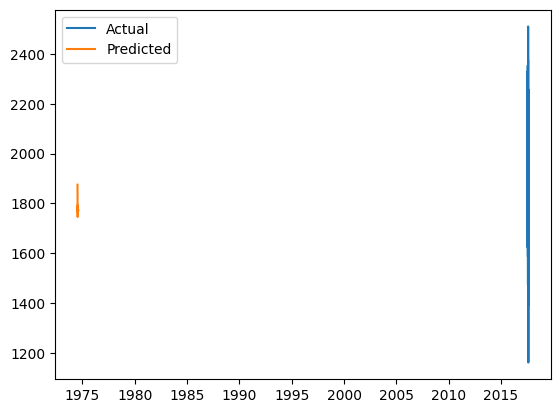

In [33]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
store_sales = df1.groupby(['store_nbr', 'date'])['sales'].sum().reset_index()
store_sales = store_sales.set_index('date')
store_data = store_sales[store_sales['store_nbr'] == 1]['sales']
train_data = store_data[:-30]  # Last 30 days as test set
test_data = store_data[-30:]
order = (5, 1, 0)
arima_model = ARIMA(train_data, order=order)
model_fit = arima_model.fit()
predictions = model_fit.predict(start=len(train_data), end=len(store_data)-1)
rmse = mean_squared_error(test_data, predictions)
print(f'RMSE for store 1: {rmse}')

# Plot actual vs. predicted values (optional)
plt.plot(test_data, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

In [36]:
data = df1[['date', 'sales']]
data = data.set_index('date')
scaler = MinMaxScaler()
data['sales'] = scaler.fit_transform(data['sales'].values.reshape(-1, 1))
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)
seq_length = 10
X, y = create_sequences(data['sales'], seq_length)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

<ipython-input-36-c78c9dc2bf11>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = data[i+seq_length]


In [37]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=1) #Adjust epochs and batch size as needed

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform to get actual sales values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Evaluate the model (example using RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f'LSTM Accuracy: {accuracy}')
print(f'LSTM RMSE: {rmse}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
58474/58474 ━━━━━━━━━━━━━━━━━━━━ 459s 8ms/step - loss: 0.0326 - val_loss: 0.0269
Epoch 2/5
58474/58474 ━━━━━━━━━━━━━━━━━━━━ 453s 7ms/step - loss: 0.0213 - val_loss: 0.0245
Epoch 3/5
58474/58474 ━━━━━━━━━━━━━━━━━━━━ 449s 7ms/step - loss: 0.0192 - val_loss: 0.0230
Epoch 4/5
58474/58474 ━━━━━━━━━━━━━━━━━━━━ 440s 7ms/step - loss: 0.0183 - val_loss: 0.0227
Epoch 5/5
58474/58474 ━━━━━━━━━━━━━━━━━━━━ 438s 7ms/step - loss: 0.0178 - val_loss: 0.0221
16243/16243 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step


ValueError: Expected 2D array, got 1D array instead:
array=[0.         0.00612216 0.0102036  ... 0.89410701 0.31539948 0.24692719].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.